# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


In [3]:
df.head(10)

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
0,-34.589,-58.417,170000.000,40.000,38.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-34.591,-58.418,90000.000,27.000,27.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-34.587,-58.437,150000.000,44.000,44.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-34.593,-58.428,154000.000,58.000,58.000,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-34.593,-58.428,154000.000,58.000,58.000,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-34.567,-58.435,65000.000,22.000,20.000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,-34.586,-58.437,175000.000,62.000,58.000,3,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,-34.583,-58.422,95000.000,32.000,32.000,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,-34.576,-58.429,95900.000,77.000,22.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,-34.578,-58.413,159000.000,32.000,30.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(6376, 59)

In [5]:
df.ndim

2

El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [6]:
X = df.drop(['price_aprox_usd'], axis=1) #esto quita a la columna target
y = df['price_aprox_usd'] #esta es la columna target

# Realizá la separación a continuación en esta celda
from sklearn.model_selection import train_test_split #importar módulo Skl

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2) #separa conjuntos 

print("Train test size: ", X_train.shape)
print("Test train size: ", X_test.shape)



Train test size:  (5100, 58)
Test train size:  (1276, 58)


Nota: podemos observar el número de filas para cada conjunto y además notar que hay una columna menos (58), ya que "price_aprox_usd" es utilizada como TARGET.

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [7]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor() #asigna el DTRegressor a tree_reg. Es regressor porque es una variable continua (precios).
tree_reg.fit(X_train, y_train) #entrena en los dos conjuntos

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [8]:
# Acá realizá la predicción
y_pred = tree_reg.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [9]:
# En esta celda calculá el rmse
from sklearn.metrics import mean_squared_error
import numpy as np

tree_mse = mean_squared_error(y_test, y_pred) #error cuadrático medio
tree_rmse = np.sqrt(tree_mse) #para sacar la raíz cuadrada
print("RSME: ", tree_rmse)

RSME:  24294.503377239806


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

In [10]:
rmses_train = []
rmses_test= []

profundidad = [5, 10, 15, 20, 25, 30]
for value in profundidad:
    #asigna las profundidades del árbol mediante el loop
    deep_reg_tree = DecisionTreeRegressor(max_depth=value)
    
    #entrena el modelo   
    deep_reg_tree.fit(X_train, y_train) 
    
    #predice sobre X_test, sacando el MSE y RMSE sobre y_test e y_pred_test
    y_pred_test = deep_reg_tree.predict(X_test) 
    tree_mse_test = mean_squared_error(y_test, y_pred_test)
    tree_rmse_test = np.sqrt(tree_mse_test)
    
    #predice sobre X_train, sacando el MSE y RMSE sobre y_test e y_pred_test
    y_pred_train = deep_reg_tree.predict(X_train)
    tree_mse_train = mean_squared_error(y_train, y_pred_train)
    tree_rmse_train = np.sqrt(tree_mse_train)
    
    rmses_train.append(tree_rmse_train) #agrega la información a las listas de arriba
    rmses_test.append(tree_rmse_test) #agrega la información a las listas de arriba

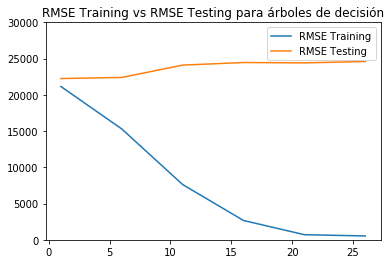

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [12]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda

from sklearn.neighbors import KNeighborsRegressor #importa la clase

knn = KNeighborsRegressor() #instancia el estimador. Acá se pueden tocar los hiperparámetros.
modelo = knn.fit(X_train, y_train) #entrena el modelo
y_predict = modelo.predict(X_test)

In [13]:
knn_mse = mean_squared_error(y_test, y_predict)

knn_mse = mean_squared_error(y_test, y_predict) #error cuadrático medio
knn_rmse = np.sqrt(knn_mse) #para sacar la raíz cuadrada
print("RSME: ", knn_rmse)

RSME:  23400.507510164327


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [16]:
# Calculá los cambio en el rmse en esta celda

rmses_train = []
rmses_test= []

kvecinos = (range(1,30,1))
for k in kvecinos:
    #asigna las profundidades del árbol mediante el loop
    kneighbors_reg = KNeighborsRegressor(n_neighbors=k)
    
    #entrena el modelo   
    kneighbors_reg.fit(X_train, y_train) 
    
    #predice sobre X_test, sacando el MSE y RMSE sobre y_test e y_pred_test
    y_pred_test = kneighbors_reg.predict(X_test) 
    kn_mse_test = mean_squared_error(y_test, y_pred_test)
    kn_rmse_test = np.sqrt(kn_mse_test)
    
    #predice sobre X_train, sacando el MSE y RMSE sobre y_test e y_pred_test
    y_pred_train = kneighbors_reg.predict(X_train)
    kn_mse_train = mean_squared_error(y_train, y_pred_train)
    kn_rmse_train = np.sqrt(kn_mse_train)
    
    rmses_train.append(kn_rmse_train) #agrega la información a las listas de arriba
    rmses_test.append(kn_rmse_test) #agrega la información a las listas de arriba


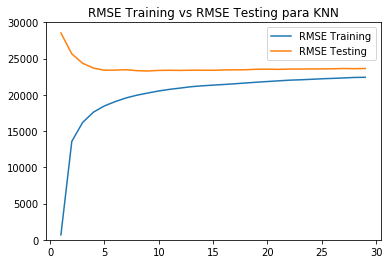

In [17]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [ ]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [ ]:
# Calculá en esta celda los cross_val_score

Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [ ]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [ ]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [ ]:
predicciones.head(10)